In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/51 [..............................] - ETA: 22s - loss: 2.1587 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 1s 4ms/step - loss: 2.0333 - accuracy: 0.1770 - val_loss: 1.8627 - val_accuracy: 0.3304
Epoch 2/1000
 1/51 [..............................] - ETA: 0s - loss: 1.9037 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 2ms/step - loss: 1.8640 - accuracy: 0.2966 - val_loss: 1.7103 - val_accuracy: 0.3948
Epoch 3/1000
 1/51 [..............................] - ETA: 0s - loss: 1.7198 - accuracy: 0.3750
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/51 [==============================] - 0s 2ms/step - loss: 1.7141 - accuracy: 0.3704 - val_loss: 1.5240 - val_accuracy: 0.4770
Epoch 4/1000
 1/51 [..............................] - ETA: 0s - loss: 1.7132 - accuracy: 0.3359
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 2ms/step - loss: 1.5603 - accuracy: 0.4233 - val_loss: 1.3737 - val_accuracy: 0.5244
Epoch 5/1000
 1/51 [..............................] - ETA: 0s - loss: 1.4970 - accuracy: 0.4766
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 2ms/step - loss: 1.4375 - accuracy: 0.4670 - val_loss: 1.2604 - val_accuracy: 0.5312
Epoch 6/1000
 1/51 [..............................] - ETA: 0s - loss: 1.2785 - accuracy: 0.5078
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 2ms/step - loss: 1.3724 - accuracy: 0.4740 - val_loss

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 976us/step - loss: 0.3320 - accuracy: 0.9301


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 47ms/step
[7.2491467e-03 5.4580357e-02 7.6224733e-06 2.2507804e-06 4.3903139e-05
 9.8347449e-08 9.3810129e-01 1.5372230e-05]
6


# Confusion matrix

68/68 [==============================] - 0s 704us/step


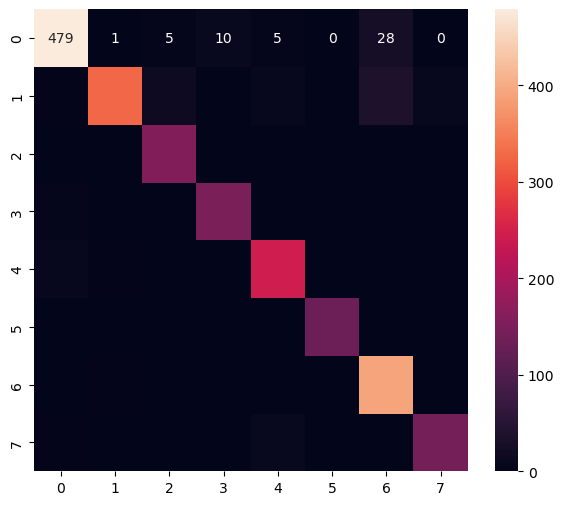

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       528
           1       0.98      0.83      0.90       395
           2       0.89      0.99      0.94       158
           3       0.94      0.97      0.96       154
           4       0.91      0.96      0.94       255
           5       1.00      0.99      1.00       132
           6       0.86      0.99      0.92       395
           7       0.94      0.91      0.92       159

    accuracy                           0.93      2176
   macro avg       0.93      0.94      0.94      2176
weighted avg       0.93      0.93      0.93      2176



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\khunt\AppData\Local\Temp\tmpds4dnomz\assets


INFO:tensorflow:Assets written to: C:\Users\khunt\AppData\Local\Temp\tmpds4dnomz\assets


6720

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.2491462e-03 5.4580402e-02 7.6224719e-06 2.2507845e-06 4.3903096e-05
 9.8347435e-08 9.3810123e-01 1.5372227e-05]
6
